<a href="https://colab.research.google.com/github/kunalbathija/Udemy-TF-2.0/blob/master/Simple_RNN_Sine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc4


In [0]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

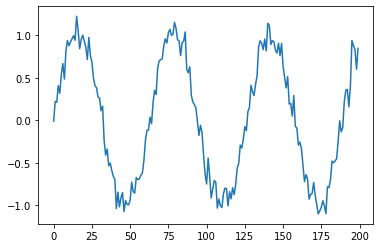

In [17]:
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1

plt.plot(series)
plt.show()

In [18]:
### build the dataset
# let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10, 1) Y.shape (190,)


In [31]:
i = Input(shape=(T, 1))
x = SimpleRNN(15)(i) #default tanh, use relu None etc etc....relu is worst
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.001),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
3/3 [==============================] - 0s 55ms/step - loss: 0.1514 - val_loss: 0.1093
Epoch 2/80
3/3 [==============================] - 0s 14ms/step - loss: 0.1069 - val_loss: 0.0761
Epoch 3/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0732 - val_loss: 0.0556
Epoch 4/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0544 - val_loss: 0.0428
Epoch 5/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0430 - val_loss: 0.0343
Epoch 6/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0339 - val_loss: 0.0280
Epoch 7/80
3/3 [==============================] - 0s 16ms/step - loss: 0.0276 - val_loss: 0.0235
Epoch 8/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0234 - val_loss: 0.0210
Epoch 9/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0209 - val_loss: 0.0204
Epoch 10/80
3/3 [==============================] - 0s 16ms/step - loss: 0.0211 - val_loss: 0.0209
Epoch 11/80
3/3 [============

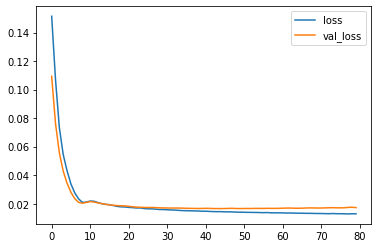

In [32]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [0]:
# "Wrong" forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1, 1))[0,0] # 1x1 array -> scalar
  i += 1
  
  # update the predictions list
  validation_predictions.append(p)

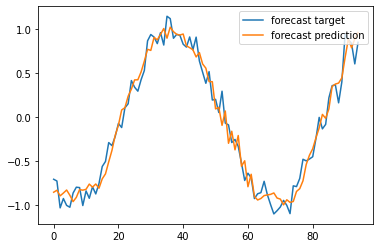

In [34]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [0]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1, 1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

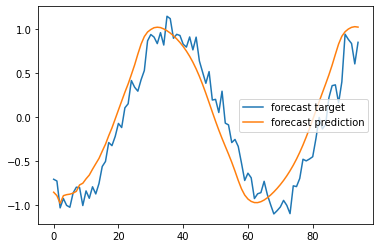

In [36]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()